In [1]:
# BiLSTM + LOSO-CV with Full Metrics, Saving, and Visualization

from datetime import datetime 
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# === Settings ===
dataset_path = 'Room2_npy'
target_length = 750
batchsize = 32
monitor_choice = 'val_loss'
patience_number = 20
dropout = 0.3
learningrate = 0.001
epochsvalue = 100
Model_type = "Bidirectional Long Short-Term Memory"
classes_to_double = ["kneel", "liedown", "pickup"]

2025-05-11 09:36:04.332728: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-11 09:36:04.368799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746920164.405285  428538 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746920164.413608  428538 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746920164.440771  428538 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Graphviz path for model plotting (optional)
os.environ["PATH"] += os.pathsep + r'C:\SIT378\windows_10_cmake_Release_Graphviz-12.1.0-win64\Graphviz-12.1.0-win64\bin'

# === Load and preprocess data ===
data_list, labels_list, subject_ids = [], [], []

def split_sequence(sequence, step):
    return [sequence[i:i + step] for i in range(0, len(sequence), step) if len(sequence[i:i + step]) == step]

for activity_folder in os.listdir(dataset_path):
    activity_path = os.path.join(dataset_path, activity_folder)
    if os.path.isdir(activity_path):
        for participant_file in os.listdir(activity_path):
            participant_path = os.path.join(activity_path, participant_file)
            if os.path.isfile(participant_path) and participant_file.endswith('.npy'):
                data = np.load(participant_path)
                data = np.real(data)
                subject_id = str(participant_file.split('_')[1].replace('.npy', ''))
                data_splits = split_sequence(data, target_length)
                for split_data in data_splits:
                    min_val = np.min(split_data)
                    max_val = np.max(split_data)
                    data_normalized = (split_data - min_val) / (max_val - min_val) if max_val != min_val else np.zeros(split_data.shape)
                    data_list.append(data_normalized)
                    labels_list.append(activity_folder)
                    subject_ids.append(subject_id)
                    if activity_folder in classes_to_double:
                        data_list.append(data_normalized.copy())
                        labels_list.append(activity_folder)
                        subject_ids.append(subject_id)

data = np.array(data_list)
labels = np.array(labels_list).reshape(-1, 1)
subject_ids = np.array(subject_ids)

# === Encode Labels ===
encoder = OneHotEncoder(sparse_output=False)
labels_encoded = encoder.fit_transform(labels)
full_class_labels = [cls.capitalize() if 'rotate' not in cls else cls.title().replace('Rotate', ' Rotate') for cls in encoder.categories_[0]]

unique_subjects = np.unique(subject_ids)
all_accuracies = []




=== LOSO Fold for Subject ID: 1 ===


2025-05-11 09:36:11.967547: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (100)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 610ms/step - accuracy: 0.1553 - loss: 2.3930 - val_accuracy: 0.2222 - val_loss: 2.1093
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 590ms/step - accuracy: 0.1462 - loss: 2.2112 - val_accuracy: 0.1111 - val_loss: 2.1705
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 633ms/step - accuracy: 0.2204 - loss: 2.0634 - val_accuracy: 0.2222 - val_loss: 2.7923
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 580ms/step - accuracy: 0.3239 - loss: 1.8549 - val_accuracy: 0.1197 - val_loss: 2.8103
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 557ms/step - accuracy: 0.3488 - loss: 1.7453 - val_accuracy: 0.2393 - val_loss: 2.2503
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 556ms/step - accuracy: 0.3795 - loss: 1.6474 - val_accuracy: 0.0342 - val_loss: 4.8825
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 561ms/step - accuracy: 0.4108 - loss: 1.5479 - val_accuracy: 0.3504 - val_loss: 2.0316
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 554ms/step - accuracy: 0.4433 - loss: 1.4534 - 

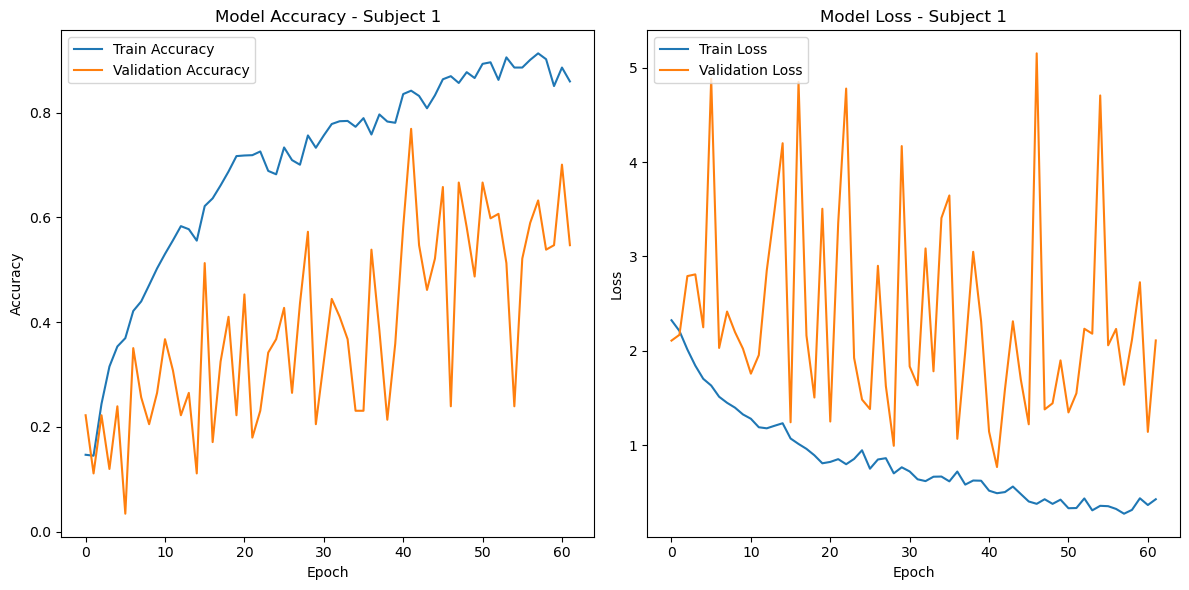


Classification Report:
              precision    recall  f1-score   support

       Kneel       0.81      1.00      0.90        26
     Liedown       1.00      0.62      0.76        26
      Pickup       0.00      0.00      0.00         0
         Sit       1.00      1.00      1.00        13
   Sitrotate       0.92      0.92      0.92        13
       Stand       1.00      0.69      0.82        13
 Standrotate       0.50      1.00      0.67        13
        Walk       0.12      0.08      0.10        13

    accuracy                           0.77       117
   macro avg       0.67      0.66      0.65       117
weighted avg       0.80      0.77      0.76       117



<Figure size 1200x800 with 0 Axes>

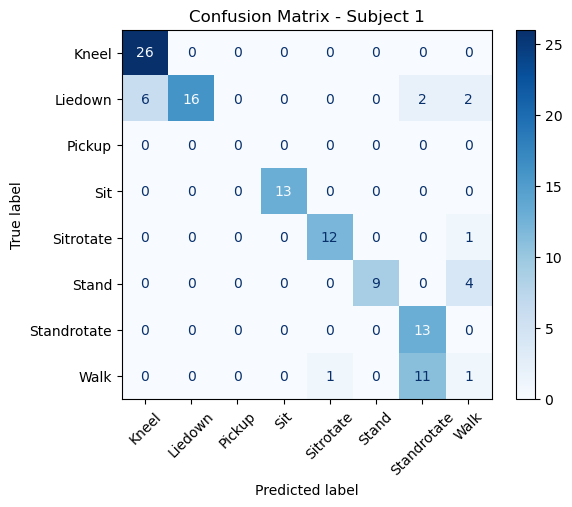


=== LOSO Fold for Subject ID: 10 ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 548ms/step - accuracy: 0.1259 - loss: 2.3827 - val_accuracy: 0.1189 - val_loss: 2.1498
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 539ms/step - accuracy: 0.1306 - loss: 2.2650 - val_accuracy: 0.0909 - val_loss: 2.2054
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 551ms/step - accuracy: 0.1495 - loss: 2.2161 - val_accuracy: 0.2308 - val_loss: 2.1204
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 542ms/step - accuracy: 0.1847 - loss: 2.1067 - val_accuracy: 0.2797 - val_loss: 1.9751
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 537ms/step - accuracy: 0.2506 - loss: 1.9353 - val_accuracy: 0.1818 - val_loss: 2.3153
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 539ms/step - accuracy: 0.3435 - loss: 1.7830 - val_accuracy: 0.4545 - val_loss: 1.6489
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 538ms/step - accuracy: 0.3842 - loss: 1.6187 - val_accuracy: 0.3357 - val_loss: 2.2258
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 539ms/step - accuracy: 0.4027 - loss: 1.5491 - 

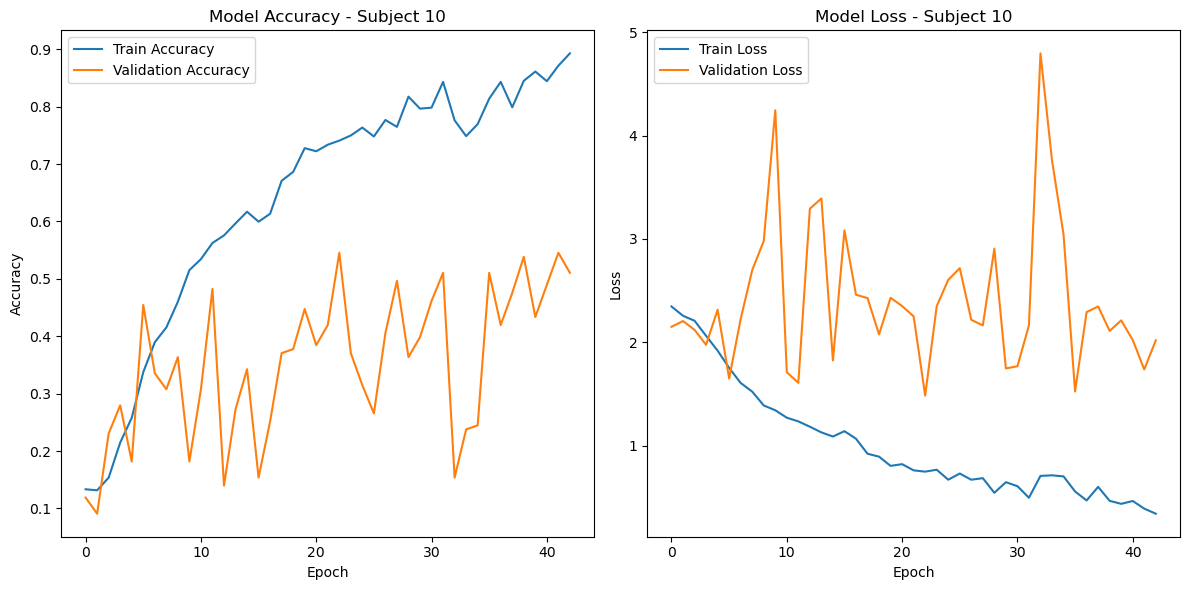


Classification Report:
              precision    recall  f1-score   support

       Kneel       0.90      1.00      0.95        26
     Liedown       0.33      0.15      0.21        26
      Pickup       0.45      0.85      0.59        26
         Sit       0.00      0.00      0.00        13
   Sitrotate       0.53      0.77      0.62        13
       Stand       0.75      0.23      0.35        13
 Standrotate       0.43      1.00      0.60        13
        Walk       0.00      0.00      0.00        13

    accuracy                           0.55       143
   macro avg       0.42      0.50      0.42       143
weighted avg       0.46      0.55      0.46       143



<Figure size 1200x800 with 0 Axes>

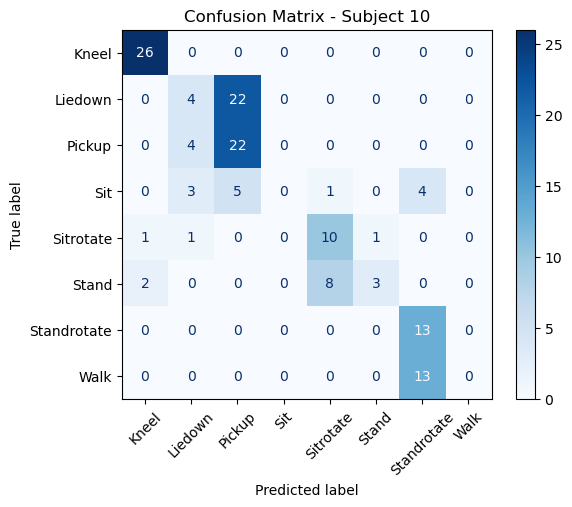


=== LOSO Fold for Subject ID: 11 ===


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 34s 557ms/step - accuracy: 0.1370 - loss: 2.4072 - val_accuracy: 0.1846 - val_loss: 2.2791
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 539ms/step - accuracy: 0.1301 - loss: 2.2686 - val_accuracy: 0.0000e+00 - val_loss: 2.3876
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 544ms/step - accuracy: 0.1498 - loss: 2.2343 - val_accuracy: 0.0000e+00 - val_loss: 2.2173
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 538ms/step - accuracy: 0.1455 - loss: 2.1569 - val_accuracy: 0.2000 - val_loss: 2.1476
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 539ms/step - accuracy: 0.2673 - loss: 1.9604 - val_accuracy: 0.2000 - val_loss: 1.8545
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 543ms/step - accuracy: 0.3195 - loss: 1.7438 - val_accuracy: 0.0000e+00 - val_loss: 4.2783
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 543ms/step - accuracy: 0.4046 - loss: 1.5134 - val_accuracy: 0.0000e+00 - val_loss: 4.5672
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 539ms/step - accuracy: 0.4325 -

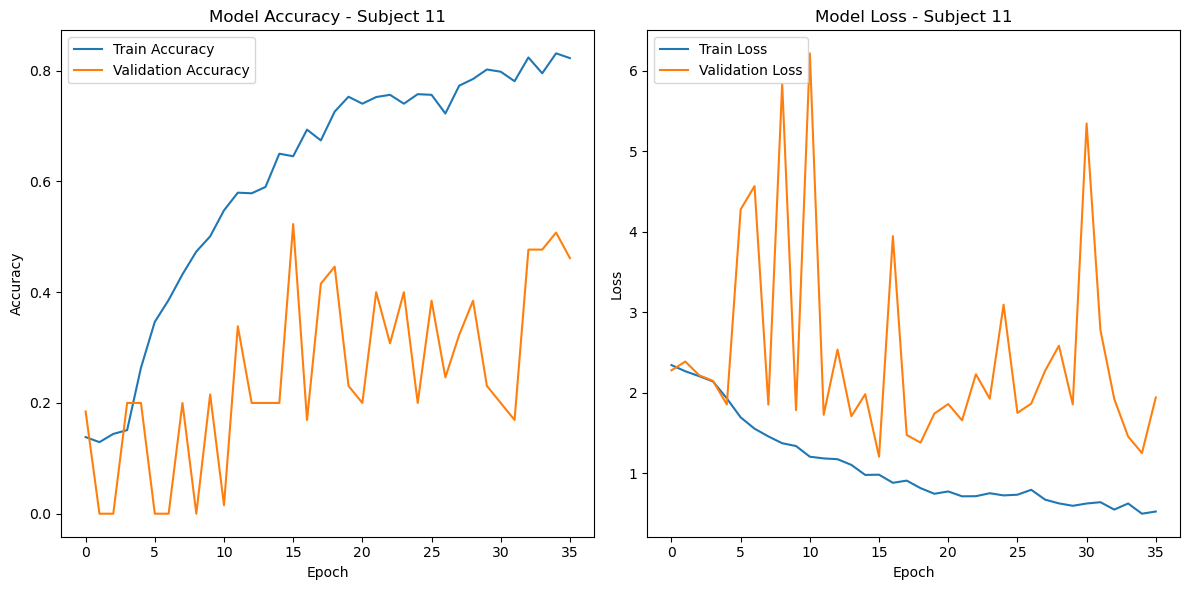


Classification Report:
              precision    recall  f1-score   support

       Kneel       0.00      0.00      0.00         0
     Liedown       0.00      0.00      0.00         0
      Pickup       0.00      0.00      0.00         0
         Sit       0.67      0.92      0.77        13
   Sitrotate       0.53      0.69      0.60        13
       Stand       0.00      0.00      0.00        13
 Standrotate       0.45      1.00      0.62        13
        Walk       0.00      0.00      0.00        13

    accuracy                           0.52        65
   macro avg       0.21      0.33      0.25        65
weighted avg       0.33      0.52      0.40        65



<Figure size 1200x800 with 0 Axes>

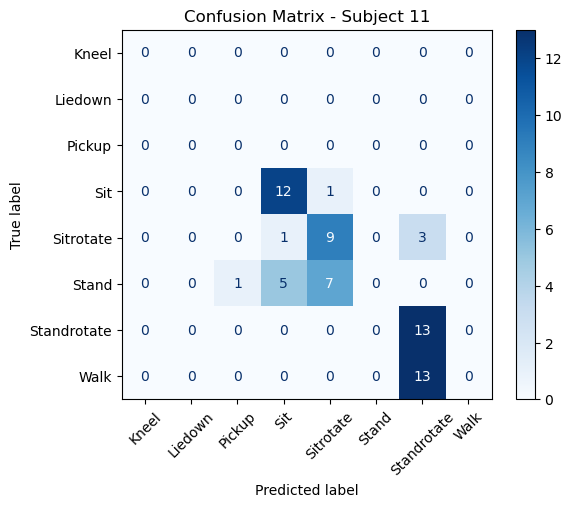


=== LOSO Fold for Subject ID: 12 ===


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (32, 750, 128)         │       224,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (32, 750, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (32, 750, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (32, 750, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (32, 64)               │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 8)                │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,208 (1.57 MB)

 Trainable params: 410,568 (1.57 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 548ms/step - accuracy: 0.0874 - loss: 2.4183 - val_accuracy: 0.0000e+00 - val_loss: 2.2607
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 550ms/step - accuracy: 0.1355 - loss: 2.2271 - val_accuracy: 0.0000e+00 - val_loss: 2.2177
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 540ms/step - accuracy: 0.1395 - loss: 2.1845 - val_accuracy: 0.0000e+00 - val_loss: 2.2213
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 544ms/step - accuracy: 0.1457 - loss: 2.1796 - val_accuracy: 0.0308 - val_loss: 2.1824
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 546ms/step - accuracy: 0.1345 - loss: 2.1568 - val_accuracy: 0.0000e+00 - val_loss: 2.2794
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 544ms/step - accuracy: 0.2041 - loss: 2.0606 - val_accuracy: 0.0000e+00 - val_loss: 2.5539
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 545ms/step - accuracy: 0.2781 - loss: 1.8787 - val_accuracy: 0.0308 - val_loss: 2.2535
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 542ms/step - accuracy: 0.31

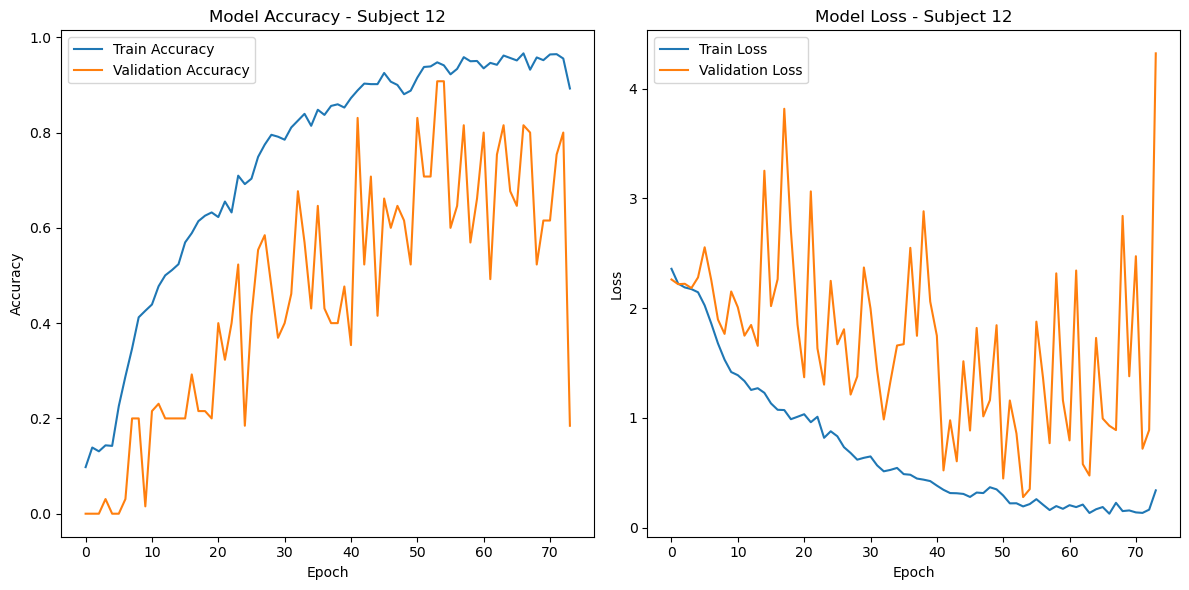


Classification Report:
              precision    recall  f1-score   support

       Kneel       0.00      0.00      0.00         0
     Liedown       0.00      0.00      0.00         0
      Pickup       0.00      0.00      0.00         0
         Sit       1.00      1.00      1.00        13
   Sitrotate       1.00      1.00      1.00        13
       Stand       1.00      1.00      1.00        13
 Standrotate       0.77      0.77      0.77        13
        Walk       0.77      0.77      0.77        13

    accuracy                           0.91        65
   macro avg       0.57      0.57      0.57        65
weighted avg       0.91      0.91      0.91        65



<Figure size 1200x800 with 0 Axes>

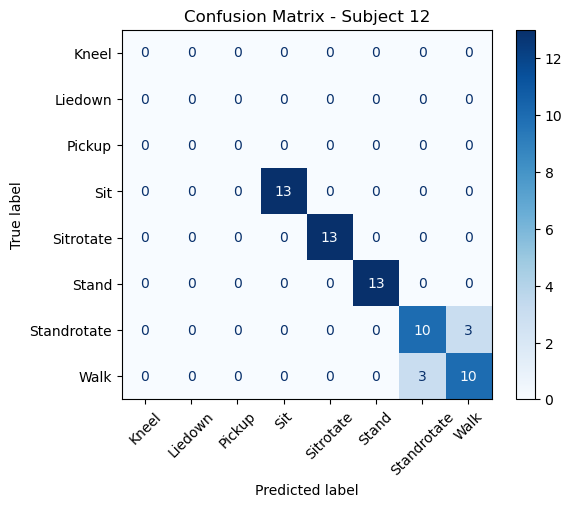


=== LOSO Fold for Subject ID: 13 ===


In [ ]:
# === LOSO-CV Loop ===
for subject in unique_subjects:
    print(f"\n=== LOSO Fold for Subject ID: {subject} ===")
    test_mask = subject_ids == subject
    train_mask = subject_ids != subject
    X_train, X_test = data[train_mask], data[test_mask]
    y_train_encoded = labels_encoded[train_mask]
    y_test_encoded = labels_encoded[test_mask]

    model = Sequential([
        Input(batch_size=batchsize, shape=(X_train.shape[1], X_train.shape[2])),
        Bidirectional(LSTM(128, return_sequences=True), merge_mode='sum'),
        Dropout(dropout),
        BatchNormalization(),
        LSTM(128, return_sequences=True),
        Dropout(dropout),
        BatchNormalization(),
        LSTM(64),
        Dropout(dropout),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(y_train_encoded.shape[1], activation='softmax')
    ])

    

    model.compile(optimizer=Adam(learning_rate=learningrate), loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor=monitor_choice, patience=patience_number, restore_best_weights=True)
    model.summary()
    

    start_time = datetime.now()
    history = model.fit(
        X_train, y_train_encoded,
        epochs=epochsvalue,
        batch_size=batchsize,
        validation_data=(X_test, y_test_encoded),
        callbacks=[early_stopping],
        verbose=1
    )
    end_time = datetime.now()
    time_difference = (end_time - start_time).total_seconds() / 60

    train_loss = history.history['loss'][-1]
    train_accuracy = history.history['accuracy'][-1]
    test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

    print(f"Final training loss: {train_loss:.4f}")
    print(f"Final training accuracy: {train_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Training time for subject {subject}: {time_difference:.2f} minutes")

    y_pred_encoded = model.predict(X_test)
    y_pred = np.argmax(y_pred_encoded, axis=1)
    y_true = np.argmax(y_test_encoded, axis=1)

    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy for Subject {subject}: {acc:.4f}")
    all_accuracies.append(acc)

    model.save(f'bilstm_model_subject_{subject}.keras')

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy - Subject {subject}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss - Subject {subject}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(
        y_true,
        y_pred,
        labels=list(range(len(full_class_labels))),
        target_names=full_class_labels,
        zero_division=0
    ))

    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(full_class_labels))))
    disp = ConfusionMatrixDisplay(cm, display_labels=full_class_labels)
    plt.figure(figsize=(12, 8))
    disp.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.title(f'Confusion Matrix - Subject {subject}')
    plt.show()

print("\n=== LOSO CV COMPLETE ===")
print("Accuracies per subject:", all_accuracies)
print("Mean Accuracy:", np.mean(all_accuracies))